In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [80]:
spotify= pd.read_csv("spotify_2024.csv", encoding="ISO-8859-1") #### few latin words aren't comparable in UTF_8 encoding
spotify.head(5).T

,0,1,2,3,4
Track,MILLION DOLLAR BABY,Not Like Us,i like the way you kiss me,Flowers,Houdini
Album Name,Million Dollar Baby - Single,Not Like Us,I like the way you kiss me,Flowers - Single,Houdini
Artist,Tommy Richman,Kendrick Lamar,Artemas,Miley Cyrus,Eminem
Release Date,4/26/2024,5/4/2024,3/19/2024,1/12/2023,5/31/2024
ISRC,QM24S2402528,USUG12400910,QZJ842400387,USSM12209777,USUG12403398
All Time Rank,1,2,3,4,5
Track Score,725.4,545.9,538.4,444.9,423.3
Spotify Streams,"390,470,936","323,703,884","601,309,283","2,031,280,633","107,034,922"
Spotify Playlist Count,"30,716","28,113","54,331","269,802","7,223"
Spotify Playlist Reach,"196,631,588","174,597,137","211,607,669","136,569,078","151,469,874"


<h4>Data Cleaning</h4>
<div>
    <p>POA:</p>
    <ul>
        <li>Check for nulls.</li>
        <li>Convert datatypes if they aren't as expected.</li>
        <li>Outlier treatment and purging columns based on steps 1 and 2.</li>
        <li>Handle duplicate entries if any.</li>
    </ul>
</div>

<h5> Null checks </h5>


In [81]:
print(f"rows and colums are {spotify.shape[0]} and {spotify.shape[1]} respectively")
# spotify.isnull().sum()
a=pd.DataFrame(spotify.isnull().sum()).reset_index()
a["proportion"]= round(a[0]/spotify.shape[0]*100,2)
a

rows and colums are 4600 and 29 respectively


,index,0,proportion
0,Track,0,0.00
1,Album Name,0,0.00
2,Artist,5,0.11
3,Release Date,0,0.00
4,ISRC,0,0.00
5,All Time Rank,0,0.00
6,Track Score,0,0.00
7,Spotify Streams,113,2.46
8,Spotify Playlist Count,70,1.52
9,Spotify Playlist Reach,72,1.57


In [82]:
spotify.nunique()

Track                         4370
Album Name                    4005
Artist                        1999
Release Date                  1562
ISRC                          4598
All Time Rank                 4577
Track Score                    862
Spotify Streams               4425
Spotify Playlist Count        4207
Spotify Playlist Reach        4478
Spotify Popularity              94
YouTube Views                 4290
YouTube Likes                 4283
TikTok Posts                  3318
TikTok Likes                  3615
TikTok Views                  3616
YouTube Playlist Reach        3458
Apple Music Playlist Count     322
AirPlay Spins                 3267
SiriusXM Spins                 689
Deezer Playlist Count          233
Deezer Playlist Reach         3558
Amazon Playlist Count          147
Pandora Streams               3491
Pandora Track Stations        2975
Soundcloud Streams            1265
Shazam Counts                 4002
TIDAL Popularity                 0
Explicit Track      

In [83]:
spotify.drop('TIDAL Popularity', axis=1, inplace=True)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [84]:
for col in (spotify.iloc[:, 5:27].columns):
    if spotify[col].dtype == object:
        spotify[col] = spotify[col].str.replace(',', '').apply(pd.to_numeric, errors='coerce')

for i in (spotify.iloc[:, 5:27].columns):
    spotify[i].fillna(spotify[i].median(),inplace=True)

for col in spotify.columns:
    if spotify[col].dtype == float:
        spotify[col] = spotify[col].astype(int)
spotify['Release Date'] = pd.to_datetime(spotify['Release Date'])
spotify.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   int64         
 7   Spotify Streams             4600 non-null   int64         
 8   Spotify Playlist Count      4600 non-null   int64         
 9   Spotify Playlist Reach      4600 non-null   int64         
 10  Spotify Popularity          4600 non-null   int64         
 11  YouTube Views               4600 non-null   int64       

In [85]:
spotify['Release Month'] = spotify['Release Date'].dt.month
spotify['Release Year'] = spotify['Release Date'].dt.year

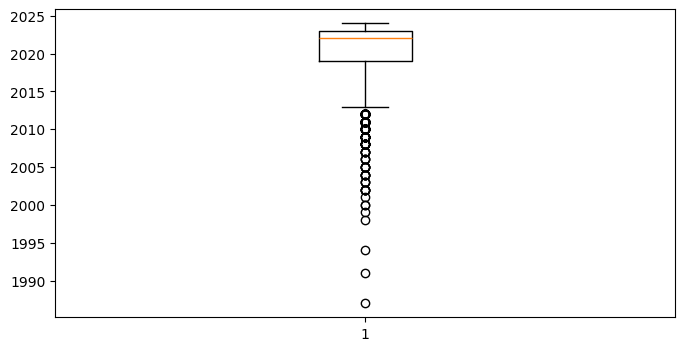

' HENCE USING ONLY DATA FROM 2014'

In [86]:
fig,ax=plt.subplots(figsize=(8,4))
ax.boxplot(spotify['Release Year'].astype(int))
plt.show()

""" HENCE USING ONLY DATA FROM 2014"""

<h3>  Top 100 Artists vs Others </h3>

Ideally Top 20 consititute for majority of the streams but keeping it in line with chart-toppers we take top 100

In [87]:
#get song count for artist
artist_song_counts = spotify['Artist'].value_counts().reset_index()
artist_song_counts.columns = ['Artist', 'Song Count']
artist_avg_track_score = spotify.groupby('Artist')['Track Score'].mean().reset_index()
artist_avg_track_score.columns = ['Artist', 'Average Track Score']
artist_stats = pd.merge(artist_song_counts, artist_avg_track_score, on='Artist')

#get normalized song count for each artist
max_songs = artist_stats['Song Count'].max()
artist_stats['Normalized Song Count'] = artist_stats['Song Count'] / max_songs

max_Track_Score = artist_stats['Average Track Score'].max()
artist_stats['Normalized Track Score'] = artist_stats['Average Track Score'] / max_Track_Score

#combine scores using weighted formula
artist_stats['Combined Score'] = (
    0.2 * artist_stats['Normalized Track Score'] +
    0.8 * artist_stats['Normalized Song Count'])

artist_stats = artist_stats.sort_values(by='Combined Score', ascending=False)
top_100_artists = artist_stats.head(100)['Artist']

spotify['Category'] = spotify['Artist'].apply(lambda x: 'Top 100' if x in top_100_artists.values else 'Others')
print(artist_stats.head(10))


           Artist  Song Count  Average Track Score  Normalized Song Count  \
0           Drake          63            45.063492               1.000000   
1    Taylor Swift          63            40.412698               1.000000   
2       Bad Bunny          60            46.866667               0.952381   
3         KAROL G          32            51.968750               0.507937   
4      The Weeknd          31            48.258065               0.492063   
5    Travis Scott          30            46.800000               0.476190   
6   Billie Eilish          27            81.740741               0.428571   
7   Ariana Grande          26            50.807692               0.412698   
8          Future          23            62.565217               0.365079   
10    Post Malone          22            71.727273               0.349206   

    Normalized Track Score  Combined Score  
0                 0.112941        0.822588  
1                 0.101285        0.820257  
2                

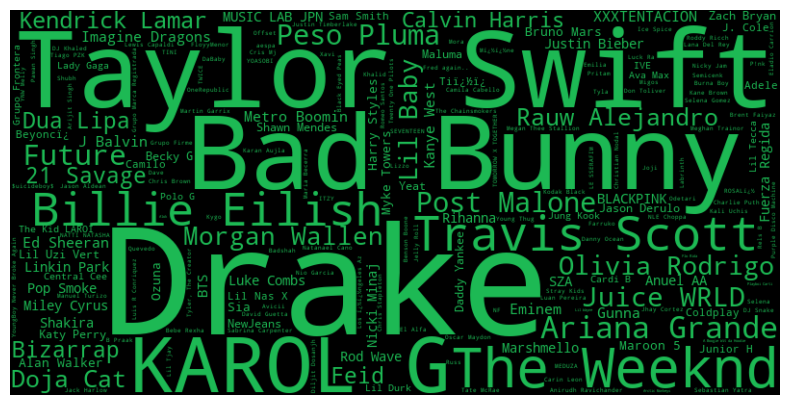

In [88]:
word_cloud_data = dict(zip(artist_stats['Artist'], artist_stats['Song Count']))
from wordcloud import WordCloud

#define the spotify green color to use
def single_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "#1db954"

wordcloud = WordCloud(width=800, height=400, background_color='black', color_func=single_color_func).generate_from_frequencies(word_cloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h4> FIltered Data for > 2014 </h4>

In [89]:
spotify_filtered_year_artist= spotify.loc[(spotify['Category']=='Top 100') & (spotify['Release Year']>2014)]
spotify_filtered_artist= spotify.loc[(spotify['Category']=='Top 100')]
spotify_filtered_year= spotify.loc[(spotify['Release Year']>2014)]

In [90]:
corr_data = spotify_filtered_year[['All Time Rank', 'Track Score', 'Spotify Streams','Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity',
                                   'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count',
                                   'Explicit Track', 'Release Year']]

corr = spotify.corr(numeric_only=True)
corr.style.background_gradient(cmap='Greens_r')


,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Release Month,Release Year
All Time Rank,1.000000,-0.633591,-0.290328,-0.247353,-0.377873,-0.189570,-0.224877,-0.256717,-0.198908,-0.097082,-0.100838,-0.274540,-0.340892,-0.283647,-0.208753,-0.272955,-0.254051,-0.371385,-0.093016,-0.093643,-0.109475,-0.161275,-0.028447,0.005802,-0.109557
Track Score,-0.633591,1.000000,0.246716,0.188458,0.495620,0.175253,0.196940,0.213014,0.224319,0.094270,0.103262,0.298049,0.371726,0.348613,0.262536,0.311921,0.476135,0.508796,0.052643,0.075041,0.071009,0.120538,0.041661,-0.030889,0.126605
Spotify Streams,-0.290328,0.246716,1.000000,0.798704,0.578808,0.309379,0.426254,0.520521,0.054515,0.052316,0.039799,0.268853,0.703011,0.415663,0.163185,0.607374,0.064912,0.435026,0.543888,0.363368,0.185463,0.416974,0.002726,-0.050151,-0.557123
Spotify Playlist Count,-0.247353,0.188458,0.798704,1.000000,0.611981,0.337574,0.325996,0.427505,0.058277,0.072311,0.058201,0.214768,0.685331,0.396315,0.199310,0.564662,0.032366,0.396564,0.520531,0.351074,0.229604,0.430760,0.125487,-0.044026,-0.614749
Spotify Playlist Reach,-0.377873,0.495620,0.578808,0.611981,1.000000,0.435188,0.200276,0.257831,0.009205,0.041213,0.032697,0.311536,0.667581,0.424647,0.244572,0.623126,0.500124,0.690281,0.344961,0.230752,0.057179,0.305937,0.011171,-0.096107,-0.295397
Spotify Popularity,-0.189570,0.175253,0.309379,0.337574,0.435188,1.000000,0.034137,0.098188,-0.121392,-0.033680,-0.043782,0.116223,0.250391,0.144453,0.072908,0.210927,0.199507,0.255509,0.156974,0.083030,0.035180,0.143849,0.064758,-0.018765,-0.106659
YouTube Views,-0.224877,0.196940,0.426254,0.325996,0.200276,0.034137,1.000000,0.833161,0.045859,0.005891,0.008913,0.212285,0.326474,0.104714,0.000635,0.350394,-0.036661,0.195654,0.326122,0.351493,0.037619,0.237256,-0.143378,-0.032272,-0.502599
YouTube Likes,-0.256717,0.213014,0.520521,0.427505,0.257831,0.098188,0.833161,1.000000,0.097667,0.052968,0.047550,0.272463,0.392458,0.170868,0.051878,0.404369,-0.025059,0.235043,0.310706,0.326375,0.079684,0.272668,-0.106874,-0.026791,-0.465548
TikTok Posts,-0.198908,0.224319,0.054515,0.058277,0.009205,-0.121392,0.045859,0.097667,1.000000,0.510356,0.536970,0.017953,0.081497,0.052764,0.073362,0.090370,-0.004980,0.035898,-0.002239,0.051402,-0.000644,0.058688,-0.037526,-0.008254,-0.120533
TikTok Likes,-0.097082,0.094270,0.052316,0.072311,0.041213,-0.033680,0.005891,0.052968,0.510356,1.000000,0.992565,0.046633,0.060549,0.069737,0.108549,0.045063,0.009140,0.042026,-0.009245,0.009627,-0.003601,0.034326,-0.006961,-0.009667,-0.100169


<h3> Top 100 vs Other for Different Platforms </h3>

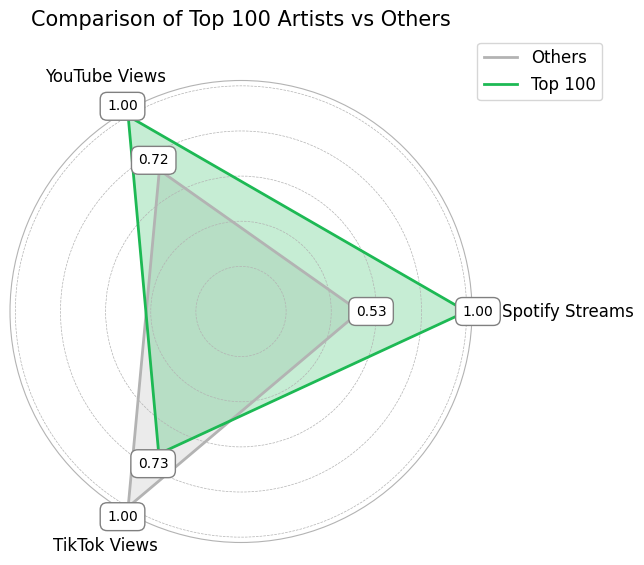

In [91]:
#get the two catergory (100 vs others) values
category_averages = spotify.groupby('Category')[['Spotify Streams', 'YouTube Views', 'TikTok Views']].mean().reset_index()

#normalize the values
max_values = category_averages[['Spotify Streams', 'YouTube Views', 'TikTok Views']].max()
category_averages[['Spotify Streams', 'YouTube Views', 'TikTok Views']] = category_averages[['Spotify Streams', 'YouTube Views', 'TikTok Views']] / max_values

#prep for radar chart
labels = ['Spotify Streams', 'YouTube Views', 'TikTok Views']
categories = category_averages['Category']
values = category_averages[['Spotify Streams', 'YouTube Views', 'TikTok Views']].values

#formula -> add the first value to the end to close the radar chart loop
values = np.concatenate([values, values[:, [0]]], axis=1)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))
spotify_green = '#1DB954'
neutral_color = '#B3B3B3'

#plot for each category
colors = { 'Top 100': spotify_green, 'Others': neutral_color }
for i, category in enumerate(categories):
    ax.plot(angles, values[i], linewidth=2, linestyle='solid', label=category, color=colors[category])
    ax.fill(angles, values[i], alpha=0.25, color=colors[category])
    
    #add value labels for each category
    for j, (label, value) in enumerate(zip(labels, values[i])):
        angle = angles[j]
        ax.text(angle, value + 0.05, f'{value:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

#add labels for platform
label_positions = {
    'Spotify Streams': (angles[0], 1.45),
    'YouTube Views': (angles[1], 1.2),
    'TikTok Views': (angles[2], 1.2)
}
for label, (angle, distance) in label_positions.items():
    ax.text(angle, distance, label, horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

ax.set_yticklabels([])
ax.set_xticks([])
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
ax.set_title('Comparison of Top 100 Artists vs Others', size=15, color='black', y=1.1)

ax.spines['polar'].set_color(neutral_color)
ax.grid(color=neutral_color, linestyle='--', linewidth=0.5)

plt.show()


<h3> Explicit Song Analysis </h3>

In [92]:
# pop_test=sqldf('''select  [Explicit Track],Category,  count(distinct Track) as tracks_player  from spotify_2015 group by  [Explicit Track], Category  ''', env= None )
# df=sqldf('''select  a.[Explicit Track],a.Category,a.tracks_player,tracks_player*1.0/tracks as proportion  from pop_test a left join (select Category, sum(tracks_player) as tracks from pop_test group by Category) b on a.Category=b.Category ''', env= None )
# # sqldf('''select Category, sum(tracks_player) as tracks from pop_test group by Category''',env=None)
# df
'''Pandas equivalent'''

#count distinct tracks using groupby
pop_test = spotify_filtered_year.groupby(['Explicit Track', 'Category']).agg(
    tracks_player=('Track', 'nunique')
).reset_index()

#tracks oer cat
total_tracks_per_category = pop_test.groupby('Category').agg(
    tracks=('tracks_player', 'sum')
).reset_index()

#get proportions
df = pop_test.merge(total_tracks_per_category, on='Category')
df['proportion'] = df['tracks_player'] / df['tracks']

print(df)

   Explicit Track Category  tracks_player  tracks  proportion
0               0   Others           2007    2913     0.68898
1               1   Others            906    2913     0.31102
2               0  Top 100            637    1282     0.49688
3               1  Top 100            645    1282     0.50312


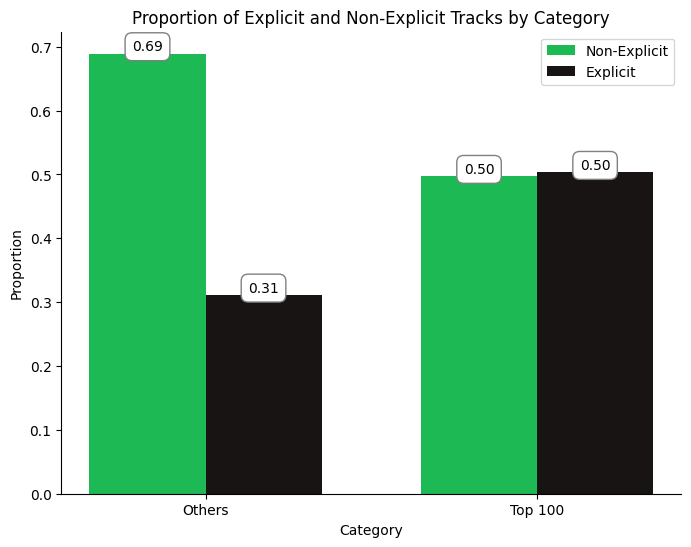

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35

#separate based on explicit
index = np.arange(len(df['Category'].unique()))
non_explicit = df[df['Explicit Track'] == 0]
explicit = df[df['Explicit Track'] == 1]

#assign bars
bars1 = ax.bar(index - bar_width/2, non_explicit['proportion'], bar_width, label='Non-Explicit', color='#1db954')
bars2 = ax.bar(index + bar_width/2, explicit['proportion'], bar_width, label='Explicit', color='#191414')

ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Explicit and Non-Explicit Tracks by Category')
ax.set_xticks(index)
ax.set_xticklabels(df['Category'].unique())
ax.legend()

#add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,0),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom',
                    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

add_labels(bars1)
add_labels(bars2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

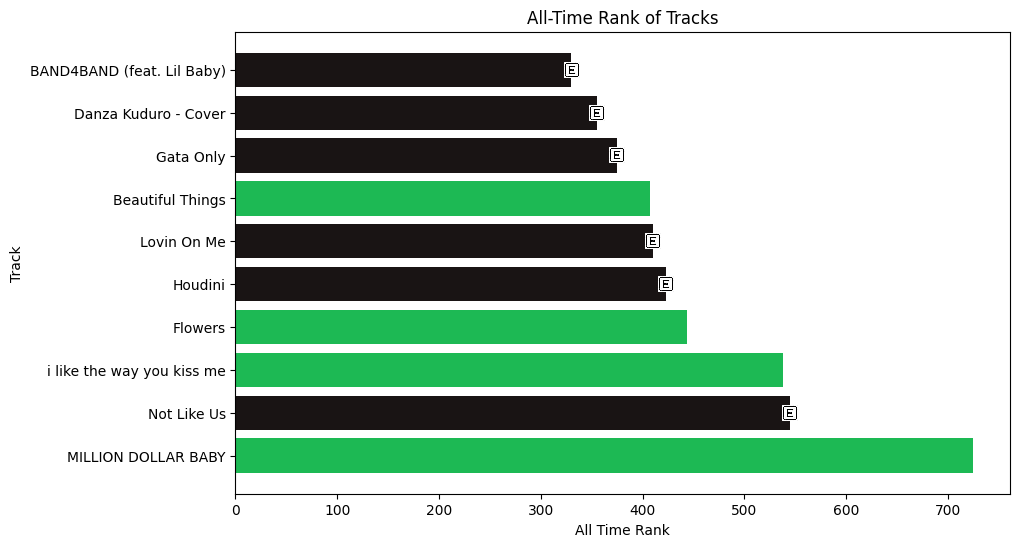

In [94]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

explicit_img = mpimg.imread('explicitsong.png')

#assign colors on explicit 
colors = ['#191414' if explicit == 1 else '#1db954' for explicit in spotify['Explicit Track']]

# add explicit symbol
def add_explicit_image(ax, rects, explicit_flags):
    for rect, is_explicit in zip(rects, explicit_flags):
        if is_explicit == 1:
            imagebox = OffsetImage(explicit_img, zoom=0.05)
            ab = AnnotationBbox(imagebox, (rect.get_width(), rect.get_y() + rect.get_height()/2 ),
                                frameon=False, boxcoords="data", pad=0.3)
            ax.add_artist(ab)

fig, ax = plt.subplots(figsize=(10, 6))
bars= ax.barh(spotify['All Time Rank'].loc[spotify['All Time Rank']<= 10], spotify['Track Score'].loc[spotify['All Time Rank']<= 10], color= colors )
add_explicit_image(ax, bars, spotify['Explicit Track'].loc[spotify['All Time Rank']<= 10])

ax.set_title('All-Time Rank of Tracks')
ax.set_ylabel('Track')
ax.set_xlabel('All Time Rank')
ax.set_yticks(range(1,len(spotify.loc[spotify['All Time Rank']<= 10])+1))
ax.set_yticklabels(spotify['Track'].loc[spotify['All Time Rank']<= 10])

plt.show()


In [95]:
interest = ['Taylor Swift', 'Drake']
filtered_df = spotify_filtered_year[spotify_filtered_year['Artist'].isin(interest)]
artist_year_stats = filtered_df.groupby(['Release Year', 'Artist']).agg(
    TotalTrackCount=('Track Score', 'size'),
    MeanTrackScore=('Track Score', 'mean'),
    SumSpotifyStreams=('Spotify Streams', 'sum'),
    YouTubeViews=('YouTube Views', 'sum'),
    TikTokViews=('TikTok Views', 'sum'),
).reset_index()
artist_year_stats['SpotifyStreamsPerSong'] = artist_year_stats['SumSpotifyStreams']/artist_year_stats['TotalTrackCount']

filtered_df_rest = spotify_filtered_year[spotify_filtered_year['Artist'].isin(top_100_artists[2:100])]
artist_year_stats_rest = filtered_df_rest.groupby(['Release Year', 'Artist']).agg(
    TotalTrackCount=('Track Score', 'size'),
    MeanTrackScore=('Track Score', 'mean'),
    SumSpotifyStreams=('Spotify Streams', 'sum'),
    YouTubeViews=('YouTube Views', 'sum'),
    TikTokViews=('TikTok Views', 'sum'),
).reset_index()
artist_year_stats_rest['SpotifyStreamsPerSong'] = artist_year_stats_rest['SumSpotifyStreams']/artist_year_stats_rest['TotalTrackCount']

tvd_years = artist_year_stats.groupby(['Release Year'] ).agg(
    TotalTrackCount=('TotalTrackCount', 'sum'),
    MeanTrackScore=('MeanTrackScore', 'mean'),
    SumSpotifyStreams=('SumSpotifyStreams', 'sum'),
    SpotifyStreamsPerSong = ('SpotifyStreamsPerSong', 'mean')
).reset_index()

other_years = artist_year_stats_rest.groupby(['Release Year']).agg(
    TotalTrackCount=('TotalTrackCount', 'sum'),
    MeanTrackScore=('MeanTrackScore', 'mean'),
    SumSpotifyStreams=('SumSpotifyStreams', 'sum'),
    SpotifyStreamsPerSong = ('SpotifyStreamsPerSong', 'mean')
).reset_index()

/var/folders/lz/4963vb9s0wq_kv4zxqnt0tnc0000gn/T/ipykernel_45624/4273355154.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  filtered_df_rest = spotify_filtered_year[spotify_filtered_year['Artist'].isin(top_100_artists[2:100])]


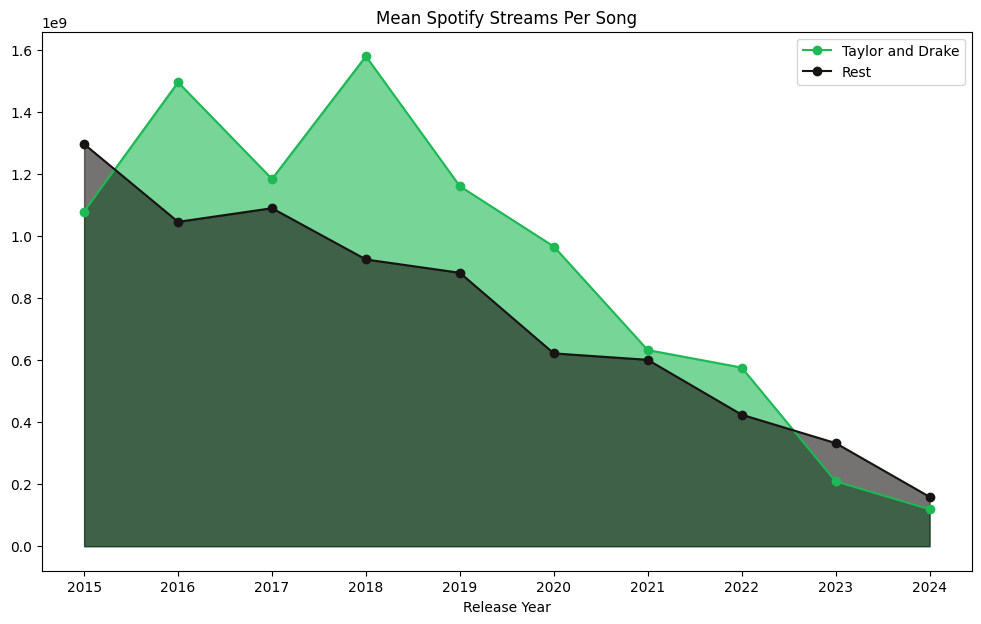

In [96]:
plt.figure(figsize=(12, 7))
plt.plot(tvd_years.index, tvd_years['SpotifyStreamsPerSong'], marker='o', label='Taylor and Drake', color='#1db954')
plt.fill_between(tvd_years.index, tvd_years['SpotifyStreamsPerSong'], color='#1db954', alpha=0.6)
plt.plot(other_years.index, other_years['SpotifyStreamsPerSong'], marker='o', label='Rest', color='#191414')
plt.fill_between(other_years.index, other_years['SpotifyStreamsPerSong'], color='#191414', alpha=0.6,)

plt.title('Mean Spotify Streams Per Song')
plt.xticks(ticks=tvd_years.index, labels=tvd_years['Release Year'])
plt.xlabel('Release Year')
plt.legend()
plt.show()

<h3> Random Exploration </h3>

</h2> using SQL for faster analysis</h2>

In [97]:
# from pandasql import sqldf
# # sqldf(query, env=None)


print("Explicit Arist are as follows")
# sqldf(''' select  [Explicit Track], count(distinct Artist) as artists from spotify group by [Explicit Track] ''', env= None)
# sqldf(''' select [Release Year], [Explicit Track], count(distinct Artist) as artists from spotify group by [Release Year],[Explicit Track] ''', env= None)
# sqldf(''' select [Release Year], count(distinct ISRC) as artists from spotify group by [Release Year] ''', env= None)
# sqldf('''select top_song, avg([Track Score]) as avg_score, avg([Spotify Streams]) as spotify_streams, avg([YouTube Views]) as youtube_views , avg([TikTok Views]) as tiktokviews  from (select case when [All Time Rank] < 20 then '< 20' else '>20' end as top_song, [Track Score], [Spotify Streams], [YouTube Views], [TikTok Views]  from spotify) a  group by top_song''',env= None)


########ED sheeran example#########
# sqldf(''' select * from spotify where Track= "Shape of You" ''', env= None)
#  [Explicit Track], count(distinct Artist) as artists from spotify group by [Explicit Track] ''', env= None)


# sqldf('''select max(ts) from (select [Track], max([Track Score]) as ts from spotify group by [Track] having count(*)>1) a''', env= None)


# spotify.head(20)
# top_5_songs = spotify.nlargest(5, 'Track Score')

# top_5_songs


# sqldf('''select sum(case when number_of_songs>3 then 1 else 0 end) as artists_gt_3, sum(case when number_of_songs<10 then 1 else 0 end) as artists_lt_3  from (select Artist, count(distinct ISRC ) as number_of_songs from spotify group by  Artist order by count(distinct ISRC)) b''', env=None)
#sqldf('''select sum(case when number_of_songs>3 then 1 else 0 end) as artists_gt_3, sum(case when number_of_songs<10 then 1 else 0 end) as artists_lt_3  from (select Artist, count(distinct ISRC ) as number_of_songs from spotify group by  Artist order by count(distinct ISRC)) b''', env=None)


# artists_songs=sqldf('''select Artist, count(distinct ISRC ) as number_of_songs, avg() from spotify group by  Artist order by count(distinct ISRC) ''', env=None)
# pd.DataFrame(artists_songs)
# artists_songs['number_of_songs'].median()


Explicit Arist are as follows
